### KMeans Algorithm

This is a type of unsupervised learning technique in which no prior labeling of data is required. In fact, the purpose of the algorithm is to group data based on distance similarity. K number of central points known as centroids are chosen and the closest datapoints in the dataset are assigned to those centroids. After each iteration, the centroid is updated by selecting the mean data point in the cluster; this pretty much explains why the algorithm is known as KMeans!

We shall follow two strategies to group our 2D data points:
- Randomly initialize the centroids
- Used KMeans++ technique to initialize the centroids

#### STEP0: Function definition
- Define a function for randomly initializing k centroid coordinates for strategy1
- Define another function for randomly initializing the first centroid only for strategy2
- Define the euclidean distance function necessary for clustering and tracking centroid reassignment


#### STEP1: Centroid initialization
- For strategy 1, just call the functions from step0 to initialize the k centroids
- For strateg2, call the function from step1 to initialize the first centroid, then implement an algorithm to assign the farthest datapoint from all current centroids as the new centroid until you have k centroids


#### STEP2: Defining the kmeans algorithm
- Once k centroids are initiated, you'll have to optmize the position of each centroid
- For every datapoint, the euclidean distance for each centroid is calculated. The datapoint is then assigned to nearest centroid.
- After the clustering for all datapoints is completed, the coordinate values of the mean of the datapoints in a cluster are also the coordinates of the new centroid.
- The process is repeated until there is no change between the old and new centroids

#### STEP3: Evaluating your model
- Recall that we don't really have any ideal clusters or labels for the data. Your ultimate goal is to minimize the total overall distance between the datapoints and their clusters; the smaller the overall all distance the better the clustering algorithm.

In [1]:
import numpy as np
import random
from sklearn.cluster import KMeans
from copy import deepcopy
from matplotlib import pyplot as plt


#STEP 0

##randomly initializing k centroids for strategy1

## Randomly select k indices out of N samples
def initial_point_idx(id, k,N):
    return np.random.RandomState(seed=(id+k)).permutation(N)[:k]

## Generate an array of the datapoints based on the k ranomly generated indices
def init_point(data, idx):
    return data[idx,:]

##randomly initializing only the first centroid for strategy2
def initial_point_idx2(id, k,N):
    random.seed((int(id)%150+k))
    init_idx2 = random.randint(0,N-1)
    return init_idx2

## Define the distance function (Euclidean distance calculator)
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)



In [2]:
# STEP 1: centroid initialization

def strategy1(idx,k):
    init_idx = initial_point_idx(idx,k,data.shape[0])
    init_s1 = init_point(data, init_idx)
    init_s1 = kMeans( k, init_s1)
    return init_s1

def strategy2(idx,k):
    init_idx2 = initial_point_idx2(idx,k,data.shape[0])
    #only one centroid is selected from the data point based on the randomly generated index
    init_s1 = np.array(data[init_idx2,:])
    
    #remove the centroid's coordinates from the dataset as it should be included in the probability calculations
    data1 = np.delete(data, init_idx2, axis = 0)
    
    for _ in range(1,k):
    #find the inner product to find the squared distance between the centroids added to the array and each remaining datapoint
        squared_distances = np.array([sum([np.inner(centroid - sample,centroid - sample) for centroid in init_s1]) for sample in data1 ])
    # Convert the distances into probabilities that a specific sample could be the center of a new centroid
        prob = squared_distances / squared_distances.sum()
    
        for index, probability in enumerate(prob):
            # The farthest point from the previous computed centroids will be assigned as the new centroid as it has the highest probability. 
            if probability == prob.max():
                init_s1 = np.vstack((init_s1, data1[index]))
                
                #once again, make sure to exclude the coordinates of the newly added centroid
                data1 = np.delete(data1, index, axis=0) 
            
                #break the loop once you find the point with the greatest distance from all centroids
                break
    init_s1 = kMeans(k, init_s1)   
    return init_s1

In [3]:
# STEP 2: define the Kmeans clustering alogrithm (without the centroid initialization step)

def kMeans( k, init_s1):
    init_s1_old = np.zeros(init_s1.shape)
    clusters = np.zeros(len(data))
    centroid = init_s1
    
    ##define the stopping criterion - when the centroids aren't reassigned in the next iteration
    error = dist(init_s1, init_s1_old, None)
    while (error != 0):
        for i in range(len(data)):
            ## compute the distance between the ith datapoint and each centroid
            distances = dist(data[i], init_s1)
            ## pick the centroid with the minimum distance from the ith datapoint
            cluster = np.argmin(distances)
            ## classify that ith datapoint into the cluster with the minimum distance from the centroid
            clusters[i] = cluster
        ## update the centroid coordinates by finding the mean x- and y- coordinates of the cluster datapoints
        for i in range(k):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            init_s1[i] = np.mean(points, axis = 0)
        error = dist(init_s1, init_s1_old, None)
        init_s1_old = deepcopy(init_s1)
        
    # STEP 3: Evaluation and plotting the clustered datapoints    
    colors = ['r', 'g', 'b', 'y', 'c','c']
    fig, ax = plt.subplots()
    total_dist = 0
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        distance = dist(init_s1[i], points)
        total_dist += distance.sum()
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(init_s1[:, 0], init_s1[:, 1], marker='*', s=200, c='#050505')

    
    
    return init_s1, total_dist

AttributeError: 'PathCollection' object has no property 'title'

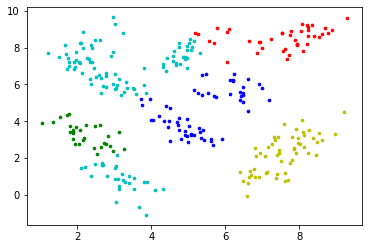

In [4]:
#loading the dataset
data = np.load('AllSamples.npy')

k1 = 6
k2 = 6
init_s1, error1 = strategy1(2006, k1)

init_s2, error2 = strategy2(2006, k2)

print("error for strategy1: ", error1)
print("error for strategy2: ", error2)

